In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [4]:
fatal_shooting = pd.read_csv('C:/Users/reetu/OneDrive/Documents/DataScience&Technologies/Project/fatal-police-shootings-data.csv', encoding="windows-1252")

In [5]:
fatal_shooting.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
6206,6770,NaN,2021-04-10,shot,gun,NaN,M,NaN,Metairie,LA,False,attack,NaN,False,-90.210,30.003,True
6207,6771,NaN,2021-04-10,shot,undetermined,NaN,M,NaN,Rockford,IL,False,undetermined,NaN,False,NaN,NaN,True
6208,6775,NaN,2021-04-10,shot,knife,NaN,M,NaN,San Marcos,TX,False,attack,Not fleeing,False,-97.933,29.874,True
6209,6767,Daunte Wright,2021-04-11,shot,undetermined,20.0,M,B,Brooklyn,MN,False,undetermined,NaN,True,-93.341,45.070,True
6210,6768,NaN,2021-04-12,shot,gun,NaN,M,NaN,Bremen,GA,False,attack,Car,False,-84.992,33.628,True


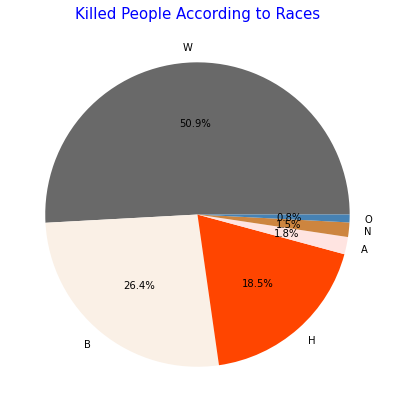

In [6]:
fatal_shooting.race.dropna(inplace=True)
labels = fatal_shooting.race.value_counts().index
colors = ['dimgrey','linen','orangered','mistyrose','peru','steelblue']
explode = [0,0,0,0,0,0]
sizes = fatal_shooting.race.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)
plt.show()

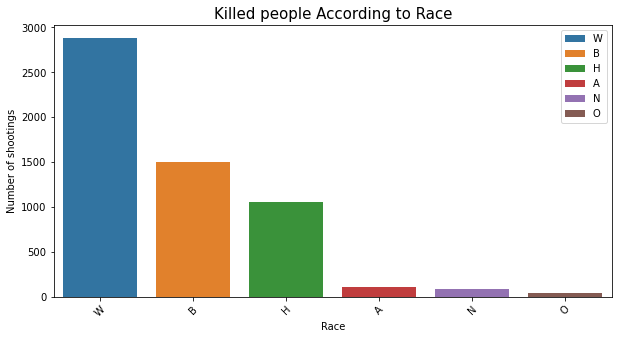

In [30]:
plt.figure(figsize=(10,5))
labels = fatal_shooting.race.value_counts().index
sizes = fatal_shooting.race.value_counts().values
ax= sns.barplot(x=labels, y=sizes, hue=labels, dodge= False)
plt.xticks(rotation = 45)
plt.xlabel("Race")
plt.ylabel("Number of shootings")
plt.title("Killed people According to Race", fontsize = 15)
plt.show()

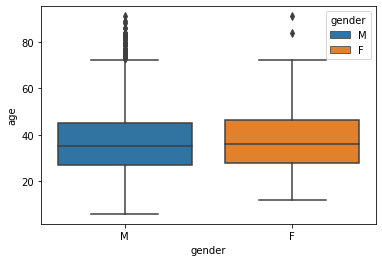

In [38]:
sns.boxplot(x="gender", y="age", hue="gender", data=fatal_shooting, dodge= False)
plt.show()

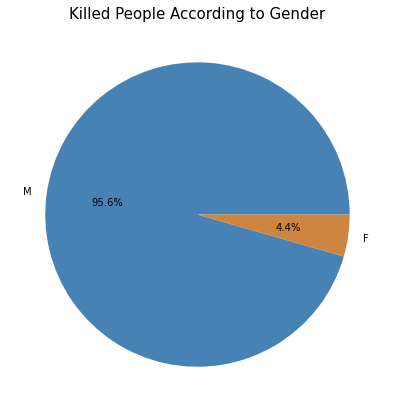

In [72]:
fatal_shooting.race.dropna(inplace=True)
labels = fatal_shooting.gender.value_counts().index
colors = ['steelblue','peru']
explode = [0,0,]
sizes = fatal_shooting.gender.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Gender',fontsize = 15)
plt.show()

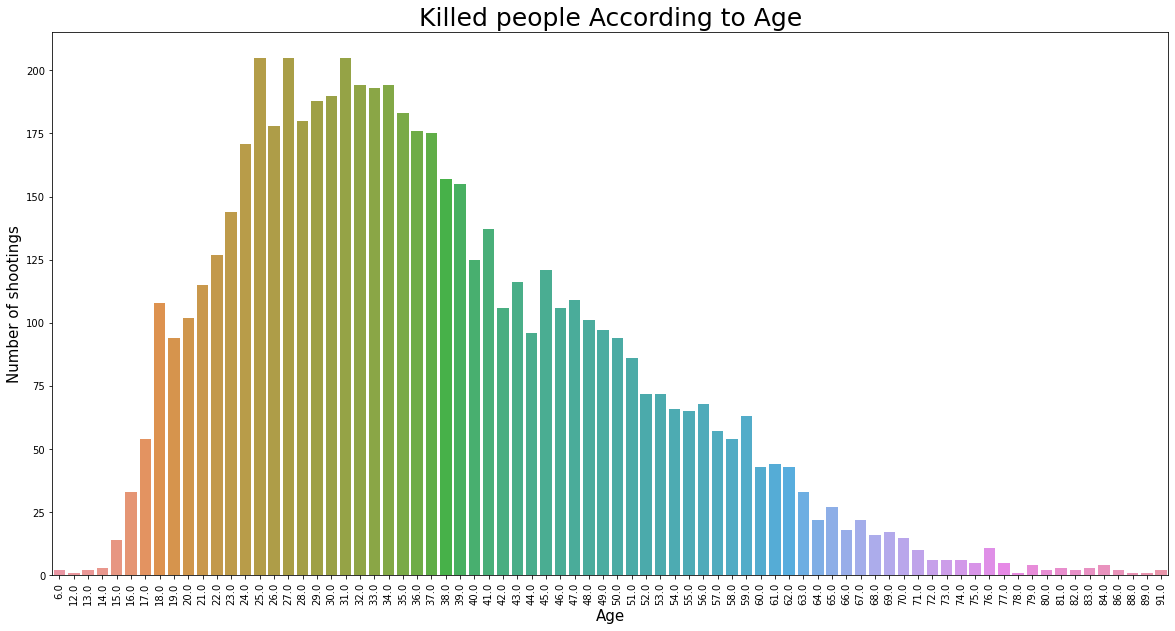

In [73]:
plt.figure(figsize=(20,10))
labels = fatal_shooting.age.value_counts().index
sizes = fatal_shooting.age.value_counts().values
ax= sns.barplot(x=labels, y=sizes, dodge= False)
plt.xticks(rotation = 90)
plt.xlabel("Age", fontsize= 15)
plt.ylabel("Number of shootings", fontsize= 15)
plt.title("Killed people According to Age", fontsize = 25)
plt.show()

In [77]:
top_states=fatal_shooting.state.value_counts().head(10)

In [78]:
print(top_states)

CA    924
TX    550
FL    417
AZ    291
CO    219
GA    213
OK    184
OH    177
NC    176
WA    175
Name: state, dtype: int64


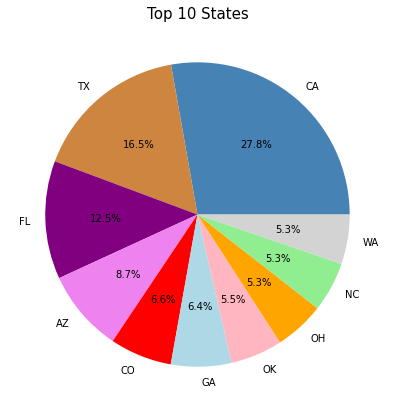

In [100]:
fatal_shooting.race.dropna(inplace=True)
labels = top_states[:20].index
sizes = top_states[:20].values
colors = ['steelblue','peru', 'purple', 'violet', 'red', 'lightblue', 'lightpink', 'orange', 'lightgreen', 'lightgrey']
explode = [0,0,0,0,0,0,0,0,0,0,]

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Top 10 States',fontsize = 15)
plt.show()

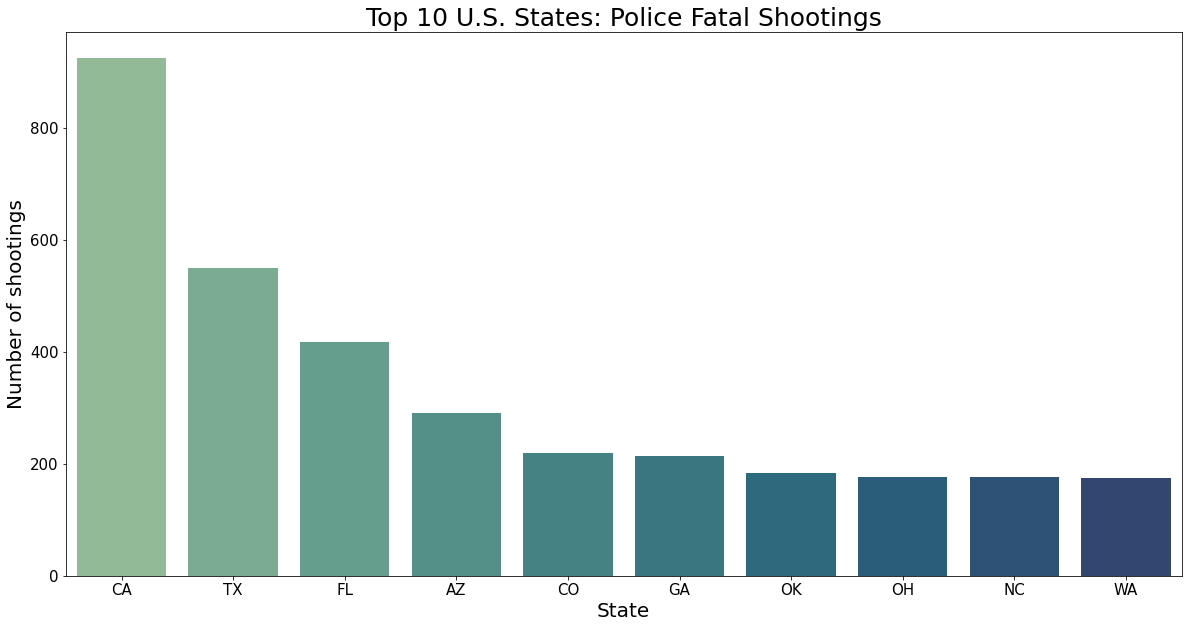

In [111]:
plt.figure(figsize=(20,10))
labels = top_states[:10].index
sizes = top_states[:10].values
ax= sns.barplot(x=labels, y=sizes,  dodge= False, palette='crest')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("State", fontsize= 20)
plt.ylabel("Number of shootings", fontsize= 20)
plt.title("Top 10 U.S. States: Police Fatal Shootings", fontsize = 25)
plt.show()

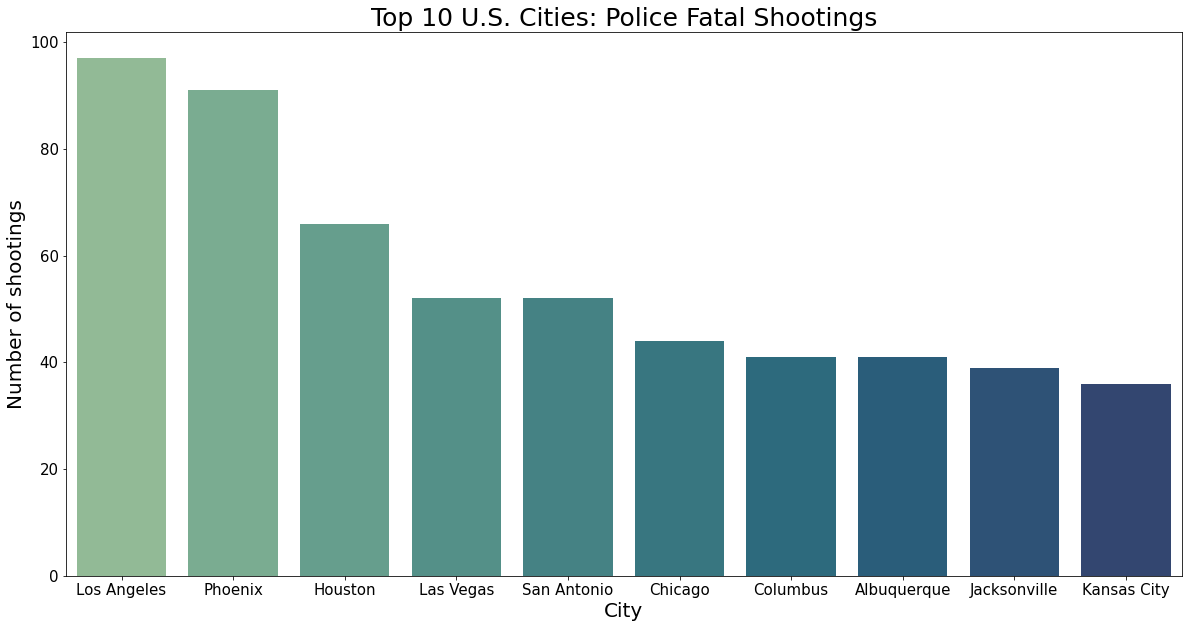

In [110]:
top_cities=fatal_shooting.city.value_counts().head(10)
plt.figure(figsize=(20,10))
labels = top_cities[:10].index
sizes = top_cities[:10].values
ax= sns.barplot(x=labels, y=sizes,  dodge= False, palette='crest')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Number of shootings", fontsize= 20)
plt.title("Top 10 U.S. Cities: Police Fatal Shootings", fontsize = 25)
plt.show()

In [119]:
fatal_shooting['date'] = pd.to_datetime(fatal_shooting['date'], errors='coerce')

In [122]:
Date=fatal_shooting['date'].groupby(fatal_shooting.date.dt.year).agg('count')
print(Date)

date
2015     993
2016     960
2017     986
2018     990
2019     999
2020    1021
2021     262
Name: date, dtype: int64


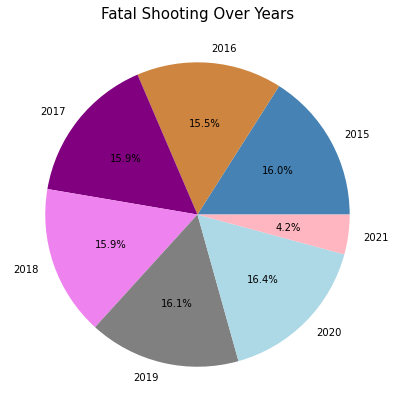

In [128]:

labels = Date.index
sizes = Date.values
colors = ['steelblue','peru', 'purple', 'violet', 'grey', 'lightblue', 'lightpink']
explode = [0,0,0,0,0,0,0]

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Fatal Shooting Over Years',fontsize = 15)
plt.show()

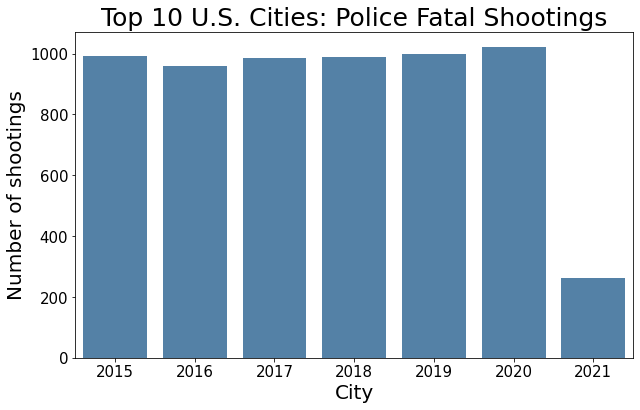

In [134]:

plt.figure(figsize=(10,6))
labels = Date.index
sizes = Date.values
ax= sns.barplot(x=labels, y=sizes,  dodge= False, color= 'steelblue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Number of shootings", fontsize= 20)
plt.title("Top 10 U.S. Cities: Police Fatal Shootings", fontsize = 25)
plt.show()

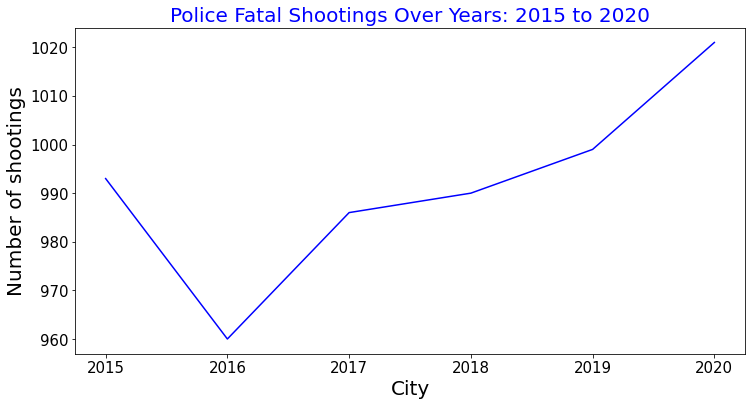

In [144]:
plt.figure(figsize=(12,6))
labels = Date[:6].index
#sizes = Date.values
ax= sns.lineplot(x=labels, y=Date[:6].values, color= 'blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("City", fontsize= 20)
plt.ylabel("Number of shootings", fontsize= 20)
plt.title("Police Fatal Shootings Over Years: 2015 to 2020", fontsize = 20, color='blue')
plt.show()